In [1]:
import pystare
import pystare as ps
import pystareplotlib
import pystareplotlib.pystareplotlib as psplot
from pystareplotlib.pystareplotlib import *

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from matplotlib.colors import ListedColormap

import cartopy.crs as ccrs
import cartopy.feature as cf
from cartopy.geodesic import Geodesic

import numpy
import math
import shapely

from PIL import Image
Image.MAX_IMAGE_PIXELS = None

import geopandas

In [2]:
# Define Global Constants and State Variables
# -------------------------------------------

# Set up the projection and transformation
# PROJ = ccrs.PlateCarree()
# PROJ = ccrs.Robinson()
PROJ = ccrs.Mollweide()
TRANSF = ccrs.Geodetic()
USR_SET_GLOBAL = True

# Plot options
usr_plot_options = {'projection': PROJ, 'transform': TRANSF}
DEFAULT_DPI = mpl.rcParamsDefault['figure.dpi']
mpl.rcParams['figure.dpi'] = 1.5 * DEFAULT_DPI
mpl.rcParams['legend.fontsize'] = 6

resolution (1000.000000 km) ~ level = 3, (float 3.356144)
(lon,lat)=(-155.602778,19.479444) -> spatial_id = 0x2c2401f47797ec43

Full spatial id:              0x2c2401f47797ec43
Geolocation part (bits 61-5): 0x2c2401f47797ec40
Resolution part  (bits  4-0): 0x0000000000000003


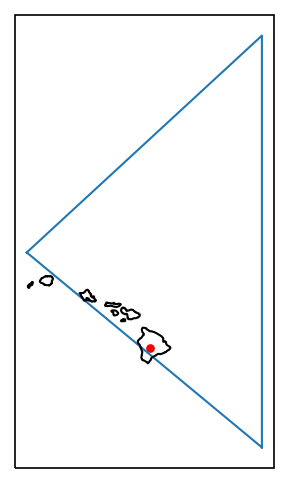

In [3]:
# Set longitude and latitude in degrees to the summit of Mauna Loa.
lon = -155.602778
lat =   19.479444

# Set some unit assumptions
km  = 1
deg = 1

# Set the length scale of a neighborhood triangular element (trixel) about the location.
resolution_scale_km = 1000*km

# Determine the resolution, i.e. the level of the spatial quadtree, of that length scale.
spatial_resolution_level = int(pystare.spatial_resolution_from_km(resolution_scale_km))

# Calculate the spatial index value.
spatial_id = pystare.from_latlon([lat],[lon],spatial_resolution_level)

# Print to check.
print('resolution (%f km) ~ level = %i, (float %f)'%(resolution_scale_km
                                          ,spatial_resolution_level
                                          ,pystare.spatial_resolution_from_km(resolution_scale_km)))
print('(lon,lat)=(%f,%f) -> spatial_id = %s'%(lon,lat,hex16(spatial_id[0])))
print()
print('Full spatial id:              %s'%(hex16(spatial_id[0])))
print('Geolocation part (bits 61-5): %s'%(hex16(spatial_id[0] & (~31))))
print('Resolution part  (bits  4-0): %s'%(hex16(spatial_id[0] & ( 31))))

# Plot the trixel associated with the spatial index value
usr_figax, sivs_cache, sivs_triang = hello_plot(spatial_id,show_fig=False)
# usr_figax = add_coastlines(figax_container(plt.subplots(subplot_kw={'projection':proj,'transform':transf})))

# Plot the geolocation (lon,lat) as a red dot.
usr_figax.ax.scatter([lon],[lat],s=10,c='r')
plt.show()
del usr_figax

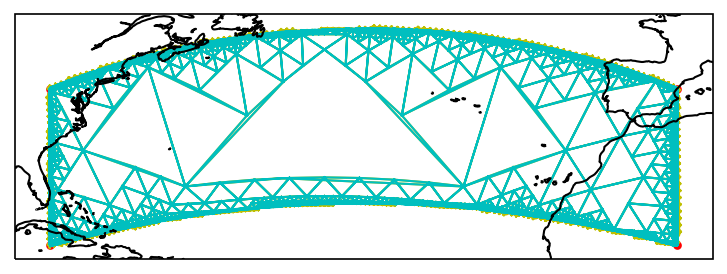

In [5]:
# pt1=(45.0, 315.0)
# pt2=(44.0, 314.0)

pt1=(40.0, 280.0)
pt2=(20.0, 0.0)

lat=[pt1[0],pt2[0],pt2[0],pt1[0]]
lon=[pt1[1],pt1[1],pt2[1],pt2[1]]

usr_figax, sivs_cache, sivs_triang = hello_plot(show_fig=False)

resolution=8
sids = ps.expand_intervals(ps.to_box_cover_from_latlon(lat, lon, resolution),-1,multi_resolution=True)
usr_figax, sivs_cache, sivs_triang = hello_plot(sids,figax=usr_figax,color='y',show_fig=False)

if True:
    resolution=10
    sids = ps.expand_intervals(ps.to_box_cover_from_latlon(lat, lon, resolution),-1,multi_resolution=True)
    usr_figax, sivs_cache, sivs_triang = hello_plot(sids,figax=usr_figax,color='c',show_fig=False)

if False:
    resolution=12
    sids = ps.expand_intervals(ps.to_box_cover_from_latlon(lat, lon, resolution),-1,multi_resolution=True)
    usr_figax, sivs_cache, sivs_triang = hello_plot(sids,figax=usr_figax,color='r',show_fig=False)

    resolution=14
    sids = ps.expand_intervals(ps.to_box_cover_from_latlon(lat, lon, resolution),-1,multi_resolution=True)
    usr_figax, sivs_cache, sivs_triang = hello_plot(sids,figax=usr_figax,color='k',show_fig=False)

# usr_figax = add_coastlines(figax_container(plt.subplots(subplot_kw={'projection':proj,'transform':transf})))

# Plot the geolocation (lon,lat) as a red dot.
usr_figax.ax.scatter(lon,lat,s=10,c='r')
plt.show()
del usr_figax